In [1]:
import bs4 as bs
import pickle
import requests
import datetime as dt
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import plotly.express as px
import yfinance as yf
from mplfinance.original_flavor import plot_day_summary_oclh
import scipy.stats as stats
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from datetime import datetime
import statistics
import squarify
import warnings




In [2]:
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')  


***Trabajo Práctico Individual N°2 - Finanzas***

Analisis de las compañias que conforman el S&P500

Descarga del listado de los Ticker de las compañias que componen el SP&500

In [3]:
cargaticker = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = pd.DataFrame(cargaticker[0])
df['Symbol'] = df['Symbol'].str.replace(".", "-")
tickers_symbols = df['Symbol'].values.tolist() 
GICS_sectors = df['GICS Sector'].values.tolist()


Con ayuda de la libreria de Yahoo nos descargamos la informacion de todas las compañias

In [ ]:
data = pd.DataFrame()
for t,s in zip(tickers_symbols, GICS_sectors):
    tmp = yf.download(t, start='2000-01-01', end='2021-12-31', progress=False)
    tmp.reset_index(inplace=True)
    tmp['Ticker'] = t
    tmp['GICS'] = s
    data = data.append(tmp, ignore_index=True)

data.to_csv('stock_prices.csv', sep=',')

La informacion obtenida

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS
0,2000-01-03 00:00:00,48.03125,48.25000,47.03125,47.1875,26.434864,2173400.0,MMM,Industrials
1,2000-01-04 00:00:00,46.43750,47.40625,45.31250,45.3125,25.384455,2713800.0,MMM,Industrials
2,2000-01-05 00:00:00,45.56250,48.12500,45.56250,46.6250,26.119734,3699400.0,MMM,Industrials
3,2000-01-06 00:00:00,47.15625,51.25000,47.15625,50.3750,28.220522,5975800.0,MMM,Industrials
4,2000-01-07 00:00:00,50.56250,51.90625,49.96875,51.3750,28.780722,4101200.0,MMM,Industrials


In [6]:
Listadeindustrias=data['GICS'].unique()

Composicion del S&P500

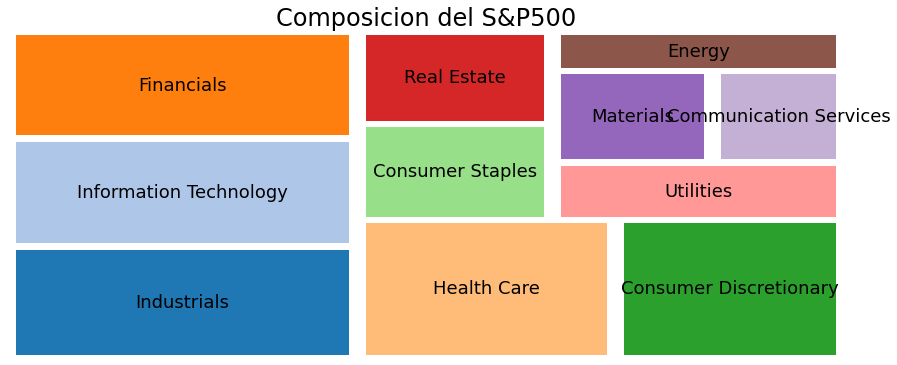

In [7]:
plt.figure(figsize=(15, 6))
plt.axis("off")
axis = squarify.plot(data['GICS'].value_counts(),
                     label=data['GICS'].value_counts().index,
                     color=sns.color_palette("tab20", len(
                         data['GICS'].value_counts())),
                     pad=2,
                     text_kwargs={'fontsize': 18})
axis.set_title("Composicion del S&P500", fontsize=24)
plt.show()

Agregamos el dia de la semana a cada registro

In [8]:
data['day_of_week'] = data['Date'].apply(pd.to_datetime).dt.dayofweek

In [9]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS,day_of_week
0,2000-01-03 00:00:00,48.031250,48.250000,47.031250,47.187500,26.434864,2173400.0,MMM,Industrials,0
1,2000-01-04 00:00:00,46.437500,47.406250,45.312500,45.312500,25.384455,2713800.0,MMM,Industrials,1
2,2000-01-05 00:00:00,45.562500,48.125000,45.562500,46.625000,26.119734,3699400.0,MMM,Industrials,2
3,2000-01-06 00:00:00,47.156250,51.250000,47.156250,50.375000,28.220522,5975800.0,MMM,Industrials,3
4,2000-01-07 00:00:00,50.562500,51.906250,49.968750,51.375000,28.780722,4101200.0,MMM,Industrials,4
...,...,...,...,...,...,...,...,...,...,...
2478157,2021-12-23 00:00:00,241.699997,244.389999,240.690002,242.509995,241.697983,1172400.0,ZTS,Health Care,3
2478158,2021-12-27 00:00:00,244.389999,246.720001,243.080002,246.509995,245.684570,807000.0,ZTS,Health Care,0
2478159,2021-12-28 00:00:00,247.000000,247.839996,243.639999,244.250000,243.432159,1004400.0,ZTS,Health Care,1
2478160,2021-12-29 00:00:00,244.020004,247.850006,243.639999,247.029999,246.202850,939900.0,ZTS,Health Care,2


Calculamos el rendimiento Intradiario

In [10]:
data['r_intra'] =data.apply(
    lambda row: np.log(row.Close/row.Open), axis=1).fillna(0)

In [11]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS,day_of_week,r_intra
0,2000-01-03 00:00:00,48.031250,48.250000,47.031250,47.187500,26.434864,2173400.0,MMM,Industrials,0,-0.017723
1,2000-01-04 00:00:00,46.437500,47.406250,45.312500,45.312500,25.384455,2713800.0,MMM,Industrials,1,-0.024524
2,2000-01-05 00:00:00,45.562500,48.125000,45.562500,46.625000,26.119734,3699400.0,MMM,Industrials,2,0.023052
3,2000-01-06 00:00:00,47.156250,51.250000,47.156250,50.375000,28.220522,5975800.0,MMM,Industrials,3,0.066028
4,2000-01-07 00:00:00,50.562500,51.906250,49.968750,51.375000,28.780722,4101200.0,MMM,Industrials,4,0.015941
...,...,...,...,...,...,...,...,...,...,...,...
2478157,2021-12-23 00:00:00,241.699997,244.389999,240.690002,242.509995,241.697983,1172400.0,ZTS,Health Care,3,0.003346
2478158,2021-12-27 00:00:00,244.389999,246.720001,243.080002,246.509995,245.684570,807000.0,ZTS,Health Care,0,0.008637
2478159,2021-12-28 00:00:00,247.000000,247.839996,243.639999,244.250000,243.432159,1004400.0,ZTS,Health Care,1,-0.011196
2478160,2021-12-29 00:00:00,244.020004,247.850006,243.639999,247.029999,246.202850,939900.0,ZTS,Health Care,2,0.012260


In [12]:
data['close2']=data.shift(periods=1).Close

Calculamos el rendimiento GAP

In [13]:
data['r_gap'] = data.apply(lambda row: np.log(row.Open/row.close2), axis = 1).fillna(0)

Corregimos el problema del cambio de Ticker

In [14]:
for i in range(0,data.shape[0]-1):
    if data.loc[i,'Ticker']!= data.loc[i+1,'Ticker']:
            data['r_gap'][i+1] = 0

In [15]:
data.r_gap= data.r_gap.astype("float")

In [16]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS,day_of_week,r_intra,close2,r_gap
0,2000-01-03 00:00:00,48.031250,48.250000,47.031250,47.187500,26.434864,2173400.0,MMM,Industrials,0,-0.017723,NaN,0.000000
1,2000-01-04 00:00:00,46.437500,47.406250,45.312500,45.312500,25.384455,2713800.0,MMM,Industrials,1,-0.024524,47.187500,-0.016022
2,2000-01-05 00:00:00,45.562500,48.125000,45.562500,46.625000,26.119734,3699400.0,MMM,Industrials,2,0.023052,45.312500,0.005502
3,2000-01-06 00:00:00,47.156250,51.250000,47.156250,50.375000,28.220522,5975800.0,MMM,Industrials,3,0.066028,46.625000,0.011330
4,2000-01-07 00:00:00,50.562500,51.906250,49.968750,51.375000,28.780722,4101200.0,MMM,Industrials,4,0.015941,50.375000,0.003715
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2478157,2021-12-23 00:00:00,241.699997,244.389999,240.690002,242.509995,241.697983,1172400.0,ZTS,Health Care,3,0.003346,241.570007,0.000538
2478158,2021-12-27 00:00:00,244.389999,246.720001,243.080002,246.509995,245.684570,807000.0,ZTS,Health Care,0,0.008637,242.509995,0.007722
2478159,2021-12-28 00:00:00,247.000000,247.839996,243.639999,244.250000,243.432159,1004400.0,ZTS,Health Care,1,-0.011196,246.509995,0.001986
2478160,2021-12-29 00:00:00,244.020004,247.850006,243.639999,247.029999,246.202850,939900.0,ZTS,Health Care,2,0.012260,244.250000,-0.000942


In [17]:
#Se elimina columna Auxiliar
data.drop(columns='close2', inplace=True)

Calculamos la rentabilidad diaria 

In [18]:
data['var'] =data["Adj Close"].pct_change()

In [19]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS,day_of_week,r_intra,r_gap,var
0,2000-01-03 00:00:00,48.031250,48.250000,47.031250,47.187500,26.434864,2173400.0,MMM,Industrials,0,-0.017723,0.000000,NaN
1,2000-01-04 00:00:00,46.437500,47.406250,45.312500,45.312500,25.384455,2713800.0,MMM,Industrials,1,-0.024524,-0.016022,-0.039736
2,2000-01-05 00:00:00,45.562500,48.125000,45.562500,46.625000,26.119734,3699400.0,MMM,Industrials,2,0.023052,0.005502,0.028966
3,2000-01-06 00:00:00,47.156250,51.250000,47.156250,50.375000,28.220522,5975800.0,MMM,Industrials,3,0.066028,0.011330,0.080429
4,2000-01-07 00:00:00,50.562500,51.906250,49.968750,51.375000,28.780722,4101200.0,MMM,Industrials,4,0.015941,0.003715,0.019851
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2478157,2021-12-23 00:00:00,241.699997,244.389999,240.690002,242.509995,241.697983,1172400.0,ZTS,Health Care,3,0.003346,0.000538,0.003891
2478158,2021-12-27 00:00:00,244.389999,246.720001,243.080002,246.509995,245.684570,807000.0,ZTS,Health Care,0,0.008637,0.007722,0.016494
2478159,2021-12-28 00:00:00,247.000000,247.839996,243.639999,244.250000,243.432159,1004400.0,ZTS,Health Care,1,-0.011196,0.001986,-0.009168
2478160,2021-12-29 00:00:00,244.020004,247.850006,243.639999,247.029999,246.202850,939900.0,ZTS,Health Care,2,0.012260,-0.000942,0.011382


Calculo de rentabilidad logaritmica (para facilitar calculos)

In [20]:
data['var log'] =np.log(data["Adj Close"]).diff()


In [21]:
#LLenamos valores faltantes
data['var'].fillna(0, inplace=True)

In [22]:
#Llenamos valores faltantes
data['var log'].fillna(0, inplace=True)

In [23]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS,day_of_week,r_intra,r_gap,var,var log
0,2000-01-03 00:00:00,48.031250,48.250000,47.031250,47.187500,26.434864,2173400.0,MMM,Industrials,0,-0.017723,0.000000,0.000000,0.000000
1,2000-01-04 00:00:00,46.437500,47.406250,45.312500,45.312500,25.384455,2713800.0,MMM,Industrials,1,-0.024524,-0.016022,-0.039736,-0.040547
2,2000-01-05 00:00:00,45.562500,48.125000,45.562500,46.625000,26.119734,3699400.0,MMM,Industrials,2,0.023052,0.005502,0.028966,0.028554
3,2000-01-06 00:00:00,47.156250,51.250000,47.156250,50.375000,28.220522,5975800.0,MMM,Industrials,3,0.066028,0.011330,0.080429,0.077358
4,2000-01-07 00:00:00,50.562500,51.906250,49.968750,51.375000,28.780722,4101200.0,MMM,Industrials,4,0.015941,0.003715,0.019851,0.019656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2478157,2021-12-23 00:00:00,241.699997,244.389999,240.690002,242.509995,241.697983,1172400.0,ZTS,Health Care,3,0.003346,0.000538,0.003891,0.003884
2478158,2021-12-27 00:00:00,244.389999,246.720001,243.080002,246.509995,245.684570,807000.0,ZTS,Health Care,0,0.008637,0.007722,0.016494,0.016360
2478159,2021-12-28 00:00:00,247.000000,247.839996,243.639999,244.250000,243.432159,1004400.0,ZTS,Health Care,1,-0.011196,0.001986,-0.009168,-0.009210
2478160,2021-12-29 00:00:00,244.020004,247.850006,243.639999,247.029999,246.202850,939900.0,ZTS,Health Care,2,0.012260,-0.000942,0.011382,0.011317


ANALISIS DE LA DISTRIBUCION DE LAS METRICAS CALCULADAS

RENDIMIENTO GAP

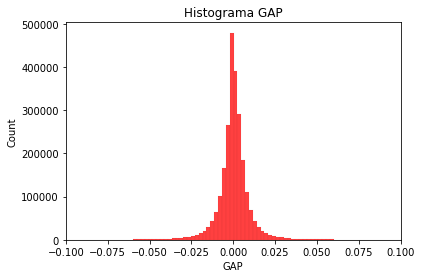

In [24]:
fig = plt.figure()
ax = plt.axes()
sns.histplot(data["r_gap"], bins=1000, color='r')
plt.xlim(-0.1, 0.1)
plt.xlabel("GAP")
plt.title("Histograma GAP")
plt.show()

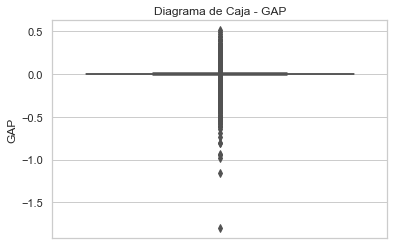

In [25]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y=data["r_gap"], color='r')
plt.ylabel("GAP")
plt.title("Diagrama de Caja - GAP")
plt.show()

RENDIMIENTO INTRADARIO

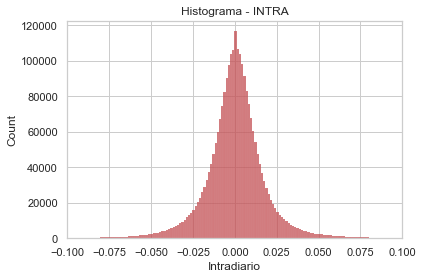

In [26]:
fig = plt.figure()
ax = plt.axes()
sns.histplot(data["r_intra"], bins=1000, color='r')
plt.xlim(-0.1, 0.1)
plt.xlabel("Intradiario")
plt.title("Histograma - INTRA")
plt.show()

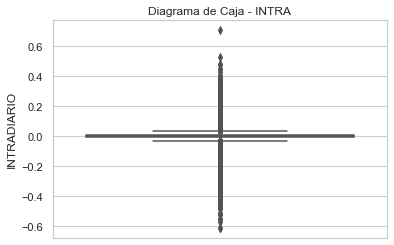

In [27]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y=data["r_intra"], color='r')
plt.ylabel("INTRADIARIO")
plt.title("Diagrama de Caja - INTRA")
plt.show()


VARIACION

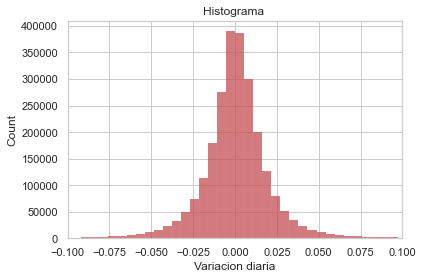

In [28]:
fig = plt.figure()
ax = plt.axes()
sns.histplot(data["var"], bins=1000, color='r')
plt.xlim(-0.1, 0.1)
plt.xlabel("Variacion diaria")
plt.title("Histograma ")
plt.show()

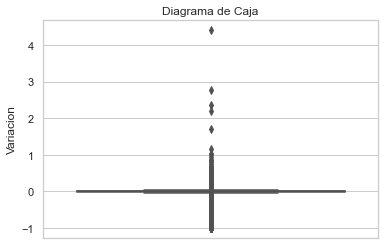

In [29]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y=data["var"], color='r')
plt.ylabel("Variacion")
plt.title("Diagrama de Caja")
plt.show()

# Cual es el mejor día para invertir teniendo en cuenta el retorno de los movimiento gap?

Agrupamos por dia de la semana 

In [30]:
data4= data.groupby('day_of_week')['r_gap'].mean().reset_index()
dias_semanas = {'Lunes':0,'Martes':1 ,'Miercoles':2 ,'Jueves': 3, 'Viernes': 4}
data4['dias_semanas'] = dias_semanas
data4= data4.reindex(columns=['day_of_week','dias_semanas','r_gap'])
data4.sort_values('r_gap')

,day_of_week,dias_semanas,r_gap
0,0,Lunes,0.000041
3,3,Jueves,0.000057
2,2,Miercoles,0.000116
4,4,Viernes,0.000222
1,1,Martes,0.000578


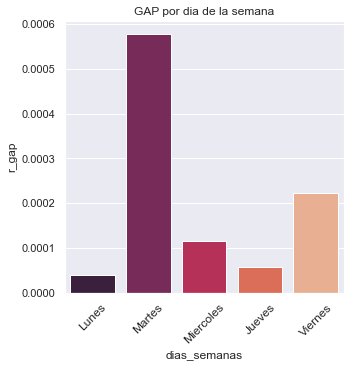

In [32]:
plt.xticks(fontsize=12,rotation=45)
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data = data4, x='dias_semanas', y='r_gap', palette="rocket")
plt.title("GAP por dia de la semana")
plt.show()


Mirando el rendimiento gap la recomendacion seria compara el lunes ya que el dia Mastes abre con un precio muy alto

# **Cual es el mejor día para invertir teniendo en cuenta el retorno de los movimientos intradiarios?**

Agrupamos por dia de la semana 

In [33]:
data5= data.groupby('day_of_week')['r_intra'].mean().reset_index()
data5['dias_semanas'] = dias_semanas
data5= data5.reindex(columns=['day_of_week','dias_semanas','r_intra'])
data5.sort_values('r_intra')

,day_of_week,dias_semanas,r_intra
0,0,Lunes,-0.000307
1,1,Martes,0.000187
2,2,Miercoles,0.000239
4,4,Viernes,0.000250
3,3,Jueves,0.000520


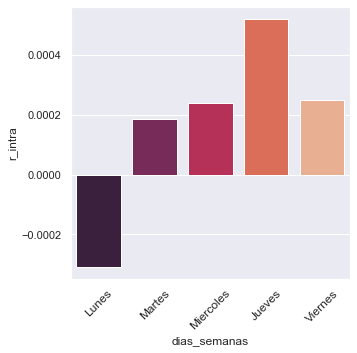

In [34]:
plt.xticks(fontsize=12,rotation=45)
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data = data5, x='dias_semanas', y='r_intra', palette="rocket")
plt.show()



Mirando el rendimiento intradiario la recomendacion seria el jueves por la mañana para poder aprovechar la suba del precio durante el dia 

# **Cuales son las mejores industrias que pertenecen al SP500 en las cuales se puede invertir?**

Agrupamos por Industria y generamos un nuevo dataframe

In [35]:
lista = data.GICS.unique()
dataindustria = data.groupby("Date").agg({ 'var':'mean'})
dataindustria.rename(columns={'var': 'SP&500'}, inplace=True)
df=pd.DataFrame()
for x in range(0,len(lista)):
    df=data[data.GICS==lista[x]]
    dataindustria[lista[x]]=df.groupby("Date")['var'].mean()

In [36]:
dataindustria

,SP&500,Industrials,Health Care,Information Technology,Communication Services,Consumer Staples,Consumer Discretionary,Utilities,Financials,Materials,Real Estate,Energy
Date,,,,,,,,,,,,
1999-12-31,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
2000-01-03,-0.776662,-0.823593,-0.859043,-0.546434,-0.793359,-0.822218,-0.837324,-0.884595,-0.633750,-0.752714,-0.868122,-0.936410
2000-01-04,-0.026378,-0.024759,-0.030318,-0.046308,-0.045848,-0.019774,-0.027245,0.007352,-0.035155,-0.021816,-0.011799,-0.014758
2000-01-05,0.006589,0.007358,0.013660,-0.004298,-0.001828,0.000549,0.003777,0.036022,-0.005105,0.027469,0.001487,0.009046
2000-01-06,0.005514,0.007977,0.013077,-0.038571,-0.018444,0.012748,-0.009992,0.000889,0.024333,0.027598,0.017828,0.047877
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.006717,0.011400,0.006556,0.007461,0.011989,0.002395,0.008087,0.000171,0.007307,0.009741,-0.002034,0.000543
2021-12-27,0.012812,0.011963,0.010559,0.019445,0.004936,0.007758,0.009759,0.004880,0.012288,0.015134,0.017386,0.027751
2021-12-28,0.001417,0.005971,-0.002692,-0.004418,0.000148,0.007788,-0.001131,0.009309,0.000694,0.006168,0.003494,-0.000390


Graficamos evolucion por industria

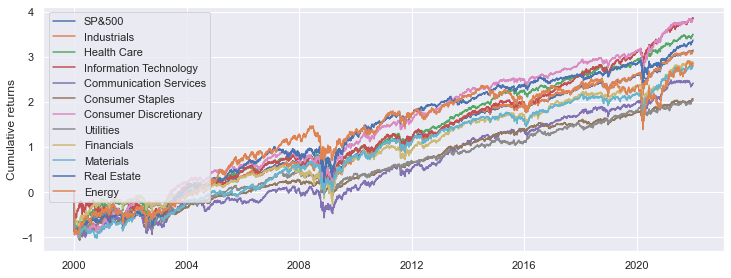

In [40]:
fig = plt.figure(figsize=(12.2,4.5))
ax = plt.axes() 
for c in dataindustria:
    ax.plot(dataindustria.index, dataindustria[c].cumsum(), label=str(c))
plt.legend(dataindustria, loc='upper left')
ax.set_ylabel('Cumulative returns')
plt.show()

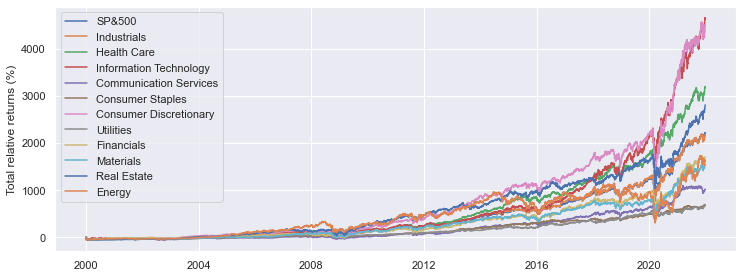

In [41]:
fig = plt.figure(figsize=(12.2,4.5))
ax = plt.axes() 
for c in dataindustria:
    ax.plot(dataindustria.index, 100*(np.exp(dataindustria[c].cumsum()) - 1), label=str(c))
plt.legend(dataindustria, loc='upper left')
ax.set_ylabel('Total relative returns (%)')

plt.show()

Visualizamos que las industrias con mejor crecimiento son Consumer Discretionary, Information Technology y Health Care

Otra manera de verlo ...

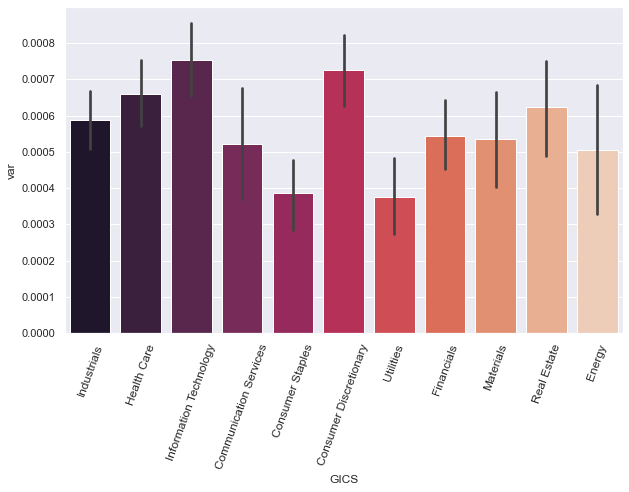

In [43]:
plt.xticks(fontsize=12,rotation=70)
sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(data= data, x = 'GICS', y = "var", palette="rocket")
plt.show()


analizando coeficiente Beta

generamos el diccionario para obtener la info 

In [44]:
sectores = {'XLI': 'Industrials',
 	     'XLV': 'Health Care',
	      'XLK': 'Information Technology',
          'XLC': 'Communication Services',
	      'XLY': 'Consumer Discretionary',
	      'XLU': 'Utilities',
	      'XLF': 'Financials',
	      'XLB': 'Materials',
	      'XLRE': 'Real Estate',
	      'XLP': 'Consumer Staples',
	      'XLE': 'Energy'}

symbols= list(sectores.keys())+['^GSPC']
dataf= yf.download(symbols, auto_Adjust=True)
returns =np.log(1- dataf.loc['2000':,'Close'].pct_change())
returns.tail()

[*********************100%***********************]  12 of 12 completed


,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,^GSPC
Date,,,,,,,,,,,,
2022-06-23,0.013587,-0.012443,0.036397,0.003825,0.005088,-0.015083,-0.019594,-0.019882,-0.023822,-0.022701,-0.015835,-0.009578
2022-06-24,-0.040516,-0.038849,-0.013249,-0.037568,-0.035583,-0.036603,-0.019789,-0.021990,-0.017550,-0.016742,-0.038885,-0.031040
2022-06-27,0.008206,0.009439,-0.029773,0.003396,0.002362,0.006721,0.002742,0.003581,-0.008148,-0.003722,0.010422,0.002969
2022-06-28,0.010625,0.028663,-0.027376,0.009880,0.011557,0.029511,0.013263,0.013589,0.003730,0.017277,0.039168,0.019943
2022-06-29,0.007172,-0.003109,0.034161,0.005625,0.005806,-0.002024,-0.006298,0.006308,-0.000722,-0.008750,0.000787,0.000711


Calculamos el coeficiente BETA del sector 'Materials' con una regresion lineal 

In [45]:
# Calcula los coeficientes de la regresión
(BETA, ALPHA, R, P, SE) = stats.linregress(returns['^GSPC'].dropna(),
returns['XLB'].dropna())



Visualmente se ve asi ...

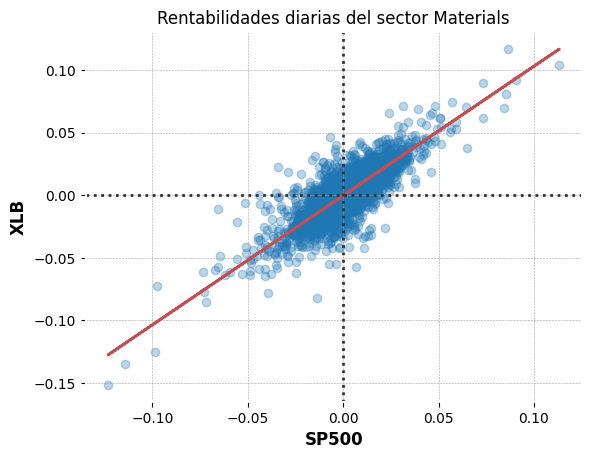

In [96]:
plt.scatter(returns['^GSPC'], returns['XLB'], alpha=0.3)
plt.plot(returns['^GSPC'], ALPHA + BETA * returns['^GSPC'], color = 'r')
plt.axvline(ls = ':', color = '0.2')
plt.axhline(ls = ':', color = '0.2')
plt.title('Rentabilidades diarias del sector Materials')
plt.xlabel('SP500')
plt.ylabel('XLB')
plt.show()

Genero un Dataframe para guardar la informacion de los BETAS de todas las industrias

In [47]:
betas=pd.DataFrame()
betas.columns[[]]
betas["Industria"]=""
betas["Beta"]= np.nan
betas["Alpha"]=np.nan
betas["R"]= np.nan
betas["Pvalue"]=np.nan
betas["SE"]= np.nan



Calculo de los BETA

In [48]:
(BETA, ALPHA, R, P, SE) = stats.linregress(returns['^GSPC'].dropna(),
returns['XLI'].dropna())
betas= betas.append({'Industria' :'Industrials' , "Beta" : BETA, "Alpha" : ALPHA,"R":R ,"Pvalue":P,"SE":SE } , ignore_index=True) 

(BETA, ALPHA, R, P, SE) = stats.linregress(returns['^GSPC'].dropna(),
returns['XLV'].dropna())
betas= betas.append({'Industria' :'Health Care' , "Beta" : BETA, "Alpha" : ALPHA,"R":R ,"Pvalue":P,"SE":SE } , ignore_index=True)  

(BETA, ALPHA, R, P, SE) = stats.linregress(returns['^GSPC'].dropna(),
returns['XLK'].dropna())
betas= betas.append({'Industria' :'Information Technology' , "Beta" : BETA, "Alpha" : ALPHA,"R":R ,"Pvalue":P,"SE":SE } , ignore_index=True)  
    
# (BETA, ALPHA, R, P, SE) = stats.linregress(returns['^GSPC'].dropna(),
# returns['XLC'].dropna())
# betas= betas.append({'Industria' :'XLC' , "Beta" : BETA, "Alpha" : ALPHA,"R":R ,"Pvalue":P,"SE":SE } , ignore_index=True) 

(BETA, ALPHA, R, P, SE) = stats.linregress(returns['^GSPC'].dropna(),
returns['XLU'].dropna())
betas= betas.append({'Industria' : 'Utilities' , "Beta" : BETA, "Alpha" : ALPHA,"R":R ,"Pvalue":P,"SE":SE } , ignore_index=True) 

(BETA, ALPHA, R, P, SE) = stats.linregress(returns['^GSPC'].dropna(),
returns['XLF'].dropna())
betas= betas.append({'Industria' :'Financials' , "Beta" : BETA, "Alpha" : ALPHA,"R":R ,"Pvalue":P,"SE":SE } , ignore_index=True) 

(BETA, ALPHA, R, P, SE) = stats.linregress(returns['^GSPC'].dropna(),
returns['XLB'].dropna())
betas= betas.append({'Industria' :'Materials' , "Beta" : BETA, "Alpha" : ALPHA,"R":R ,"Pvalue":P,"SE":SE } , ignore_index=True) 

# (BETA, ALPHA, R, P, SE) = stats.linregress(returns['^GSPC'].dropna(),
# returns['XLRE'].dropna())
# betas= betas.append({'Industria' :'Real Estate' , "Beta" : BETA, "Alpha" : ALPHA,"R":R ,"Pvalue":P,"SE":SE } , ignore_index=True) 

(BETA, ALPHA, R, P, SE) = stats.linregress(returns['^GSPC'].dropna(),
returns['XLP'].dropna())
betas= betas.append({'Industria' :'Consumer Staples' , "Beta" : BETA, "Alpha" : ALPHA,"R":R ,"Pvalue":P,"SE":SE } , ignore_index=True) 

(BETA, ALPHA, R, P, SE) = stats.linregress(returns['^GSPC'].dropna(),
returns['XLE'].dropna())
betas= betas.append({'Industria' :'Energy' , "Beta" : BETA, "Alpha" : ALPHA,"R":R ,"Pvalue":P,"SE":SE } , ignore_index=True) 





COEFICIENTE BETA DE LOS SECTORES 

In [49]:
betas.sort_values("Beta", inplace=True)
betas

,Industria,Beta,Alpha,R,Pvalue,SE
6,Consumer Staples,0.548525,-0.000119,0.706317,0.0,0.007310
3,Utilities,0.628201,-0.000112,0.631936,0.0,0.010244
1,Health Care,0.744560,-0.000146,0.802985,0.0,0.007348
0,Industrials,0.996626,-0.000060,0.901830,0.0,0.006349
5,Materials,0.999329,-0.000097,0.808963,0.0,0.009656
7,Energy,1.033757,-0.000191,0.690586,0.0,0.014396
2,Information Technology,1.157157,-0.000042,0.874272,0.0,0.008543
4,Financials,1.284230,-0.000031,0.845668,0.0,0.010777


<AxesSubplot:xlabel='Industria', ylabel='Beta'>

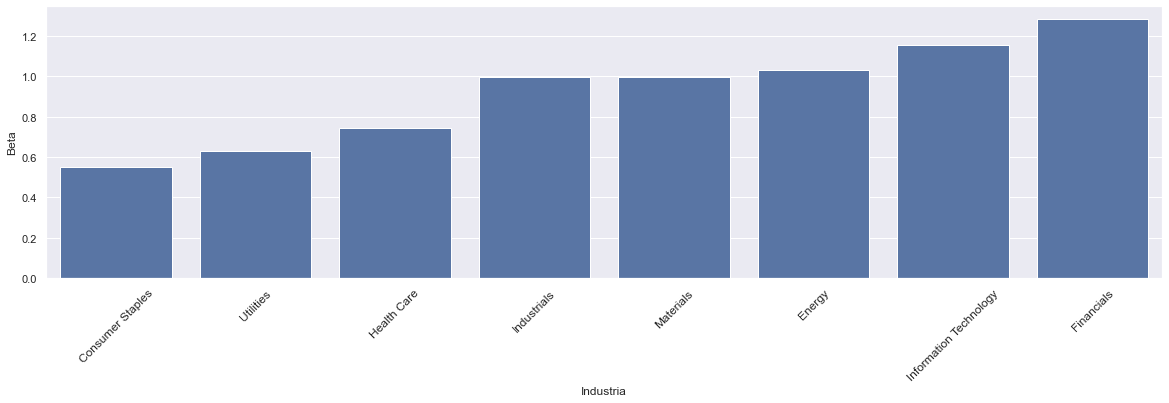

In [51]:
plt.xticks(fontsize=12,rotation=45)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data= betas, x = 'Industria', y = "Beta" , color='b' )

BETA es la sensibilidad de un activo a los movimientos del mercado

Conclusion:
- Ante una baja del mercado conviene invertir en empresas que minimicen la perdida. Por ejemplo en el sector: "Consumer Staples"
- Ante una suba del mercado conviene invertir en empresas que maximicen la suba. Por ejemplo en el sector: Financials

# **Cuales fueron los momentos de alta volatilidad que afectaron al SP500**

Agrupo mis datos por FECHA y calulo la media de mis metricas

In [52]:
dataprueba2 = data.groupby("Date").agg({ 'Open':'mean', 'High':'mean', 'Low':'mean', 'Close':'mean', 'Adj Close':'mean','r_intra':'mean', 'r_gap':'mean','var log':'mean', 'var':'mean'})

Calcula Volatilidad 

In [53]:
dataprueba2['volatility']=(dataprueba2['var'].rolling(250).std()*100*(250)**0.5).fillna(0)

In [54]:
dataprueba2

,Open,High,Low,Close,Adj Close,r_intra,r_gap,var log,var,volatility
Date,,,,,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
2000-01-03,33.101964,33.409425,31.596229,32.296211,21.251028,-0.019046,0.000000,-2.409530,-0.776662,0.000000
2000-01-04,31.792580,32.364542,30.809702,31.214336,20.520277,-0.015630,-0.011636,-0.027251,-0.026378,0.000000
2000-01-05,31.162249,32.080628,30.398047,31.412205,20.632035,0.007217,-0.001291,0.005992,0.006589,0.000000
2000-01-06,31.324910,32.337774,30.556934,31.437735,20.525001,0.006665,-0.002007,0.004753,0.005514,0.000000
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,207.720016,210.014809,206.630581,208.317295,207.195630,0.003045,0.003601,0.006656,0.006717,13.771248
2021-12-27,208.969371,211.693098,207.886691,211.150560,210.021252,0.011140,0.001485,0.012669,0.012812,13.806875
2021-12-28,211.377639,212.977615,209.639568,211.049277,209.917041,0.001395,-0.000019,0.001376,0.001417,13.796843


In [55]:
#Genero una copia para trabajar con ella
datamaxvol=dataprueba2.copy()

Ordeno buscando los dias con mayor volatilidad

In [56]:
datamaxvol.sort_values('volatility', ascending=False, inplace=True)
datamaxvol.head(10)

,Open,High,Low,Close,Adj Close,r_intra,r_gap,var log,var,volatility
Date,,,,,,,,,,
2000-12-27,34.925786,36.034620,34.546560,35.588739,23.062931,0.021086,-0.002361,0.019182,0.019898,80.084691
2000-12-26,34.701725,35.453281,34.173729,35.006642,22.638611,0.007862,0.000363,0.008230,0.008756,80.054855
2009-06-01,30.391749,31.315066,30.088606,30.921790,24.197036,0.019504,0.012863,0.032431,0.033352,50.597088
2009-06-02,30.829939,31.459770,30.408250,31.017748,24.294588,0.005212,-0.002966,0.002246,0.002541,50.596610
2009-07-02,29.762776,29.986365,29.068847,29.250699,22.972712,-0.019333,-0.012959,-0.032282,-0.031583,50.594502
2009-06-03,30.769090,31.090703,30.094871,30.564589,23.948078,-0.007292,-0.008389,-0.015550,-0.015179,50.583716
2009-06-22,29.682023,29.949799,28.911023,29.095732,22.835672,-0.023689,-0.011252,-0.034883,-0.033910,50.554339
2009-07-13,28.784734,29.451651,28.376538,29.371403,23.077076,0.020602,0.004272,0.024956,0.025498,50.547799
2009-06-23,29.201506,29.540656,28.701082,29.085702,22.817464,-0.004594,0.004427,-0.000136,0.000075,50.545385


En el 2008-2009 se produjo la crisis Subprime y se registraron caidas historicas 

Otra caida muy relevante se produjo en Marzo del 2020 producto al surgimiento del Coronavirus

Máximos de hitos 
* 24 de marzo de 2000: El índice S&P 500 alcanza un máximo intradiario histórico de 1.552,87 durante la burbuja de las puntocom . 

* 9 de octubre de 2007: el índice cierra en un máximo histórico de 1.565,15, el cierre más alto antes de la crisis financiera de 2007-2008 . Dos días después, el índice alcanza un récord intradiario de 1.576,09. No recuperó este nivel de cierre hasta el 28 de marzo de 2013. 

* 19 de febrero de 2020: el índice S&P 500 alcanzó su punto más alto en el mercado alcista que comenzó desde el punto más bajo el 9 de marzo de 2009, cerrando en 3386.15. 

* 18 de agosto de 2020: el índice S&P 500 cerró en un máximo histórico de 3389,78 en medio de la pandemia de COVID-19 en curso en los Estados Unidos .



Mínimos de hitos 

* 9 de marzo de 2009: S&P 500 cierra en 676,53 (alcanzó un mínimo intradiario de 666,79 el 6 de marzo), su mínimo de cierre tras el inicio de la crisis financiera de 2007-2008 y 

Cambios en los hitos 
•	19 de octubre de 1987: S&P 500 registra su mayor pérdida porcentual diaria, cayendo un 20,47 por ciento. El colapso de un día, conocido como " Lunes Negro " , se atribuyó al comercio de programas y a quienes usaban una estrategia de cobertura conocida como seguro de cartera. A pesar de las pérdidas, el S&P 500 aún cerró positivo durante el año. 

•	5 de febrero de 2018: Tras meses de baja volatilidad, el S&P 500 registra una nueva mayor pérdida diaria de puntos de 113,19 puntos, equivalente a más del 4%. Tres días después, el índice sufrió otra gran pérdida de casi la misma cantidad. 
•	13 de octubre de 2008: el S&P 500 marca su mejor aumento porcentual diario, con un aumento del 11,58 por ciento. También registra su aumento de puntos en un solo día más grande en ese momento de 104,13 puntos. 

•	26 de diciembre de 2018: mientras se encamina hacia el peor desempeño de diciembre desde la Gran Depresión, el S&P 500 registra una nueva mayor ganancia diaria de puntos de 116.60 puntos, lo que se traduce en aproximadamente un 5% en el índice. 


•	31 de diciembre de 2008: Para el año, el S&P 500 cae un 38,49 por ciento, su peor pérdida porcentual anual. En septiembre de 2008, Lehman Brothers colapsó a medida que se extendía la crisis financiera. 

•	16 de marzo de 2020: el índice S&P 500 sufrió su peor caída diaria desde el Lunes Negro de 1987, cayendo un 9,5 por ciento, como resultado de la ansiedad por la pandemia de coronavirus . La caída de más del 20% desde su pico, solo 16 días hábiles antes, marcó el inicio de un cierre del mercado bajista en 2.480,64. Hitos de cierre del S&;P 500 
Fuente: https://es.abcdef.wiki/wiki/Closing_milestones_of_the_S%26P_500

VEAMOSLO VISUALMENTE

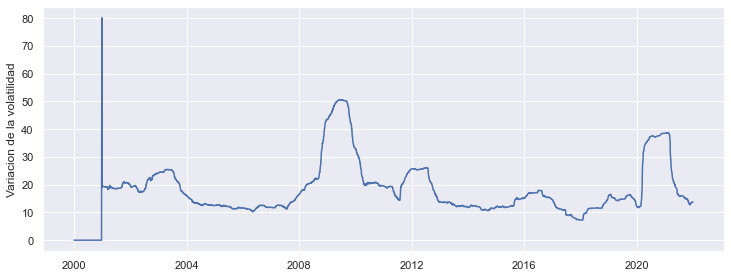

In [57]:
fig = plt.figure(figsize=(12.2,4.5))
ax = plt.axes() 
ax.plot(dataprueba2.index, dataprueba2.volatility)
ax.set_ylabel('Variacion de la volatilidad')
plt.show()



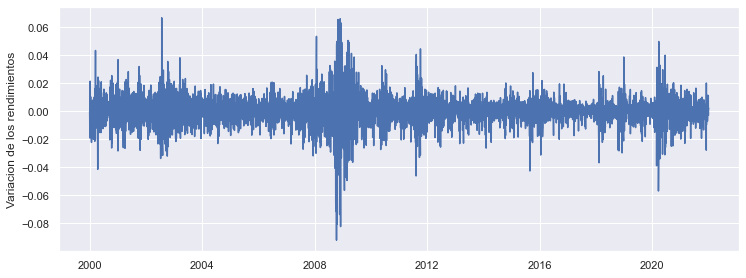

In [58]:

fig = plt.figure(figsize=(12.2,4.5))
ax = plt.axes() 
ax.plot(dataprueba2.index, dataprueba2.r_intra)
ax.set_ylabel('Variacion de los rendimientos')
plt.show()



COMPAREMOS EL SP&500 CON EL VIX

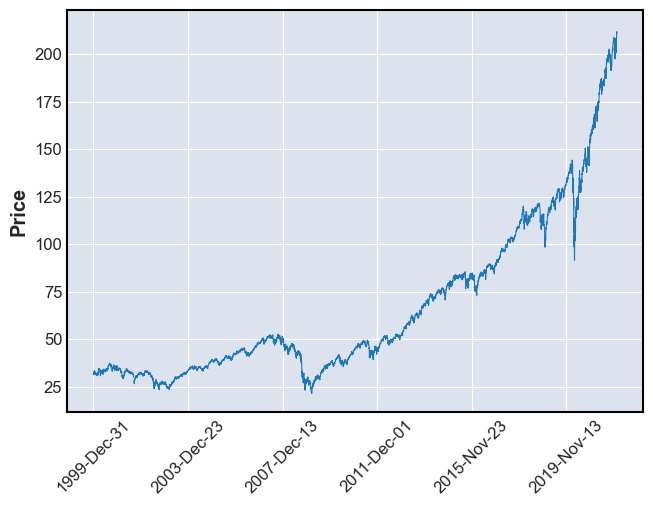

In [59]:
dataprueba = data.groupby("Date").agg({ 'Open':'mean', 'High':'mean', 'Low':'mean', 'Close':'mean', 'Adj Close':'mean','r_intra':'mean', 'r_gap':'mean','var log':'mean', 'var':'mean'})
mpf.plot(dataprueba, type='line')

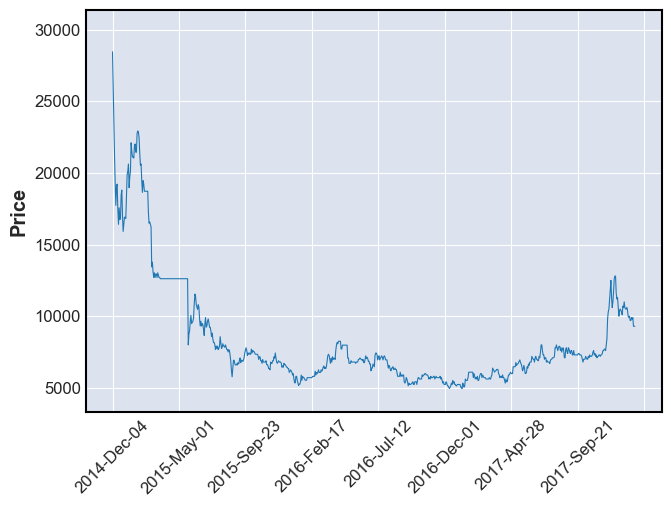

In [60]:
volatilidad = yf.download('VIX', start='2000-01-01', end='2021-12-31', progress=False)
mpf.plot(volatilidad, type='line')

EXISTE UNA RELACION ENTRE ELLOS ?

Veamos la correlacion

In [61]:
symbols2=['^VIX','^GSPC']
datar= yf.download(symbols2, auto_Adjust=True)
datarr =np.log(1- datar.loc['2000':,'Adj Close'].pct_change())
corr = datarr.corr()
corr

[*********************100%***********************]  2 of 2 completed


,^GSPC,^VIX
^GSPC,1.000000,-0.701161
^VIX,-0.701161,1.000000


VEMOS QUE EXISTE UNA CORRELACION NEGATIVA ENTRE AMBOS INDICES .

Existe una estrecha correlación inversa entre el mercado de acciones, en este caso el S&P 500, y el  índice de volatilidad VIX. Es decir, aumentos pronunciados de volatilidad vienen aparejados con caídas en la renta variable, mientras que periodos como el actual de baja volatilidad traen consigo alzas en las bolsas.

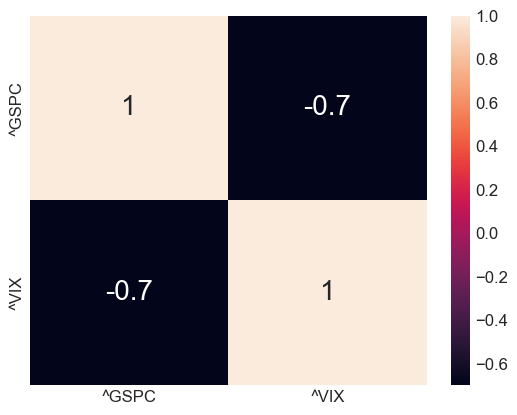

In [62]:
sns.heatmap(corr, annot=True, annot_kws={"size": 20})
plt.show()

# **Cuales son las 9 mejores empresas para invertir?**

PARA OBTENER LAS 9 MEJORES EMPRESAS PARA INVERTIR ACOTAMOS EL PERIODO DE TIEMPO DEL 01/01/2020 EN ADELANTE 

In [63]:
dataultimo = pd.DataFrame()
for t,s in zip(tickers_symbols, GICS_sectors):
    tmp = yf.download(t, start='2020-01-01', progress=False)
    tmp.reset_index(inplace=True)
    tmp['Ticker'] = t
    tmp['GICS'] = s
    dataultimo = dataultimo.append(tmp, ignore_index=True)



In [64]:
dataultimo

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS
0,2020-01-02,177.679993,180.009995,177.139999,180.000000,164.922302,3601700.0,MMM,Industrials
1,2020-01-03,177.020004,178.660004,175.630005,178.449997,163.502151,2466900.0,MMM,Industrials
2,2020-01-06,177.149994,178.710007,176.350006,178.619995,163.657913,1998000.0,MMM,Industrials
3,2020-01-07,178.279999,178.509995,176.820007,177.899994,162.998184,2173000.0,MMM,Industrials
4,2020-01-08,178.000000,181.500000,177.649994,180.630005,165.499542,2758300.0,MMM,Industrials
...,...,...,...,...,...,...,...,...,...
314925,2022-06-23,166.020004,169.380005,165.589996,169.169998,169.169998,1535600.0,ZTS,Health Care
314926,2022-06-24,172.000000,174.679993,171.389999,174.610001,174.610001,3255000.0,ZTS,Health Care
314927,2022-06-27,173.839996,175.210007,172.929993,173.600006,173.600006,1378400.0,ZTS,Health Care
314928,2022-06-28,172.960007,174.669998,170.009995,170.119995,170.119995,1725800.0,ZTS,Health Care


Para facilitar calculos calculamos la rentabilidad diaria lognormal

In [65]:
dataultimo['log_returns'] = np.log(dataultimo['Adj Close']).diff()
for i in range(0,dataultimo.shape[0]-1):
    if dataultimo.loc[i,'Ticker']!= dataultimo.loc[i+1,'Ticker']:
            dataultimo['log_returns'][i+1] = 0
dataultimo['log_returns']=dataultimo['log_returns'].dropna(0)


In [66]:
dataultimo

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS,log_returns
0,2020-01-02,177.679993,180.009995,177.139999,180.000000,164.922302,3601700.0,MMM,Industrials,NaN
1,2020-01-03,177.020004,178.660004,175.630005,178.449997,163.502151,2466900.0,MMM,Industrials,-0.008648
2,2020-01-06,177.149994,178.710007,176.350006,178.619995,163.657913,1998000.0,MMM,Industrials,0.000952
3,2020-01-07,178.279999,178.509995,176.820007,177.899994,162.998184,2173000.0,MMM,Industrials,-0.004039
4,2020-01-08,178.000000,181.500000,177.649994,180.630005,165.499542,2758300.0,MMM,Industrials,0.015229
...,...,...,...,...,...,...,...,...,...,...
314925,2022-06-23,166.020004,169.380005,165.589996,169.169998,169.169998,1535600.0,ZTS,Health Care,0.029758
314926,2022-06-24,172.000000,174.679993,171.389999,174.610001,174.610001,3255000.0,ZTS,Health Care,0.031651
314927,2022-06-27,173.839996,175.210007,172.929993,173.600006,173.600006,1378400.0,ZTS,Health Care,-0.005801
314928,2022-06-28,172.960007,174.669998,170.009995,170.119995,170.119995,1725800.0,ZTS,Health Care,-0.020250


Agrupamos por compañia , sumamos su rentabilidad y este es nuestro TOP 15

In [67]:
data_ultimo= dataultimo.groupby(['Ticker','GICS'])['log_returns'].sum().reset_index()
data_ultimo.sort_values('log_returns',ascending=False, inplace=True)
data_ultimo.head(15)

,Ticker,GICS,log_returns
447,TSLA,Consumer Discretionary,2.075153
312,MRNA,Health Care,2.005044
160,ENPH,Information Technology,1.839456
77,CARR,Industrials,1.120456
22,ALB,Materials,1.099450
384,PWR,Industrials,1.077329
194,FTNT,Information Technology,0.957900
339,NVDA,Information Technology,0.955065
408,SEDG,Information Technology,0.948894
274,LLY,Health Care,0.935687


Veamos la primera en nuestro ranking

In [68]:
TSLA = yf.download('TSLA', start='2020-01-01', progress=False)

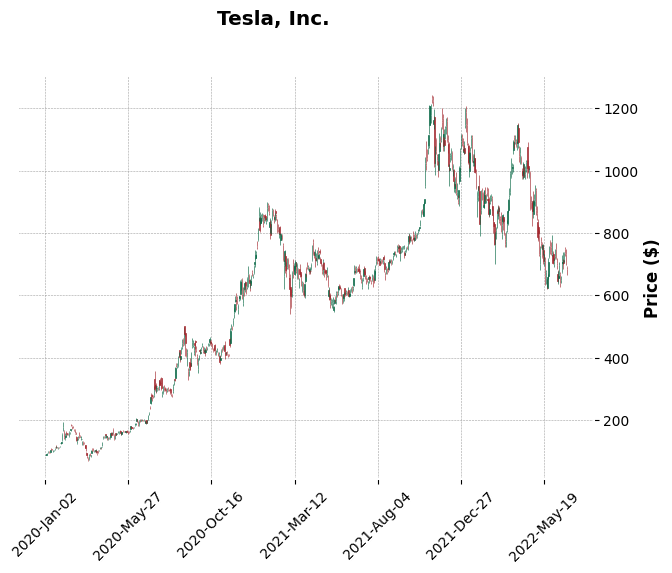

In [69]:
mpf.plot(
    TSLA,
    
    type ='candle',
    style = 'charles',
    title = 'Tesla, Inc.',
    ylabel = 'Price ($)',
    
)


Elegimos 3 compañias del sector Consumer Discretionary, 3 del sector Information Technology y 3 de Health Care

Para eso vemos el TOP 5 de cada categoria

Consumer Discretionary

In [70]:
data_ultimo[data_ultimo['GICS']=='Consumer Discretionary'].head(5)

,Ticker,GICS,log_returns
447,TSLA,Consumer Discretionary,2.075153
446,TSCO,Consumer Discretionary,0.774833
56,BBWI,Consumer Discretionary,0.652117
51,AZO,Consumer Discretionary,0.587071
376,POOL,Consumer Discretionary,0.512721


Information Technology

In [71]:
data_ultimo[data_ultimo['GICS']=='Information Technology'].head(5)

,Ticker,GICS,log_returns
160,ENPH,Information Technology,1.839456
194,FTNT,Information Technology,0.957900
339,NVDA,Information Technology,0.955065
408,SEDG,Information Technology,0.948894
310,MPWR,Information Technology,0.796998


Health Care

In [72]:
data_ultimo[data_ultimo['GICS']=='Health Care'].head(5)

,Ticker,GICS,log_returns
312,MRNA,Health Care,2.005044
274,LLY,Health Care,0.935687
292,MCK,Health Care,0.883625
307,MOH,Health Care,0.746863
490,WST,Health Care,0.686098


ELEGIDAS:
* TSLA - Tesla, Inc.
* TSCO - Tractor Supply Company 
* BBWI - Bath & Body Works, Inc.
* ENPH - Enphase Energy, Inc.
* FTNT - Fortinet, Inc.
* NVDA - NVIDIA Corporation
* MRNA - Moderna, Inc.
* LLY -  Eli Lilly and Company
* MCK -  McKesson Corporation

In [73]:
#Nuestro listado de activos elegidos
activos = ['TSLA', 'TSCO','BBWI', 'ENPH', 'FTNT', 'NVDA', 'MRNA','LLY','MCK','^GSPC' ]

In [74]:
#Fecha de inicio elegida
df_precios = pd.DataFrame()
fechaInicio = "2020-01-01"
hoy = datetime.today().strftime('%Y-%m-%d')

In [75]:
#Libreria necesaria
from pandas_datareader import data

In [76]:
def datosYahoo(dataframe,nombresActivos,inicio,fin):
    for i in nombresActivos:
        dataframe[i] = data.DataReader(i,data_source='yahoo',start=inicio , end=fin)["Adj Close"]
    return dataframe
df = datosYahoo(df_precios,activos,fechaInicio,hoy)


In [77]:
df

,TSLA,TSCO,BBWI,ENPH,FTNT,NVDA,MRNA,LLY,MCK,^GSPC
Date,,,,,,,,,,
2020-01-02,86.052002,90.110245,13.752866,29.340000,21.936001,59.803608,19.230000,126.718178,135.581360,3257.850098
2020-01-03,88.601997,88.997292,14.830136,29.290001,22.242001,58.846397,18.889999,126.296432,133.655518,3234.850098
2020-01-06,90.307999,88.697281,14.279706,29.660000,22.400000,59.093174,18.129999,126.766083,135.063232,3246.280029
2020-01-07,93.811996,87.110115,14.169621,29.990000,22.378000,59.808598,17.780001,127.005692,134.760178,3237.179932
2020-01-08,98.428001,88.755341,14.271843,31.000000,22.733999,59.920769,17.980000,128.155853,137.409454,3253.050049
...,...,...,...,...,...,...,...,...,...,...
2022-06-23,705.210022,198.779999,29.540001,200.669998,56.799999,162.250000,143.259995,312.720001,314.660004,3795.729980
2022-06-24,737.119995,202.970001,30.950001,198.389999,59.130001,171.259995,144.270004,325.619995,321.549988,3911.739990
2022-06-27,734.760010,202.509995,30.780001,206.169998,58.849998,168.690002,145.360001,327.269989,326.239990,3900.110107


GRAFICAMOS LA EVOLUCION DE LAS ACCIONES ELEGIDAS Y EL S&P500 

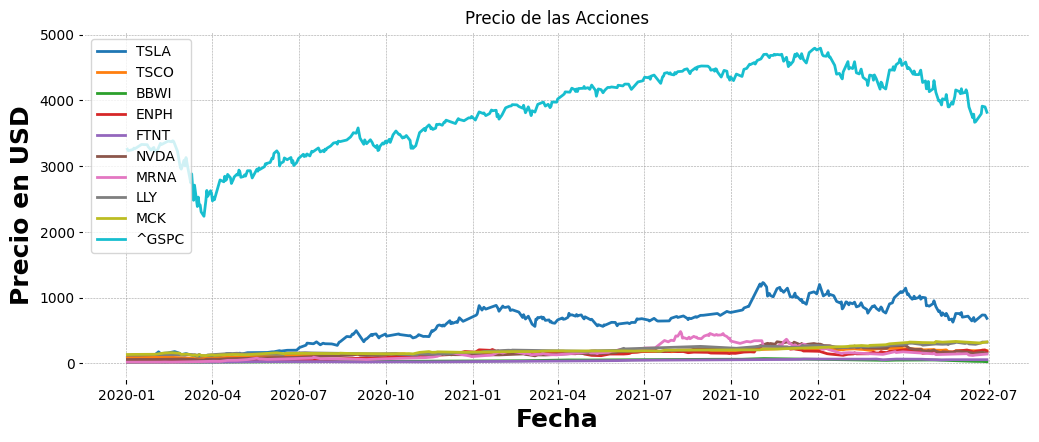

In [78]:
plt.figure(figsize=(12.2,4.5)) 
for i in df.columns.values:
    plt.plot( df[i],  label=i)
plt.title('Precio de las Acciones')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio en USD',fontsize=18)
plt.legend(df.columns.values, loc='upper left')

plt.show()

In [79]:
#Sacamos el S&P500 Para visualizar mejor
df_activos =  df.loc[:, df.columns != '^GSPC' ]


In [80]:
df_activos

,TSLA,TSCO,BBWI,ENPH,FTNT,NVDA,MRNA,LLY,MCK
Date,,,,,,,,,
2020-01-02,86.052002,90.110245,13.752866,29.340000,21.936001,59.803608,19.230000,126.718178,135.581360
2020-01-03,88.601997,88.997292,14.830136,29.290001,22.242001,58.846397,18.889999,126.296432,133.655518
2020-01-06,90.307999,88.697281,14.279706,29.660000,22.400000,59.093174,18.129999,126.766083,135.063232
2020-01-07,93.811996,87.110115,14.169621,29.990000,22.378000,59.808598,17.780001,127.005692,134.760178
2020-01-08,98.428001,88.755341,14.271843,31.000000,22.733999,59.920769,17.980000,128.155853,137.409454
...,...,...,...,...,...,...,...,...,...
2022-06-23,705.210022,198.779999,29.540001,200.669998,56.799999,162.250000,143.259995,312.720001,314.660004
2022-06-24,737.119995,202.970001,30.950001,198.389999,59.130001,171.259995,144.270004,325.619995,321.549988
2022-06-27,734.760010,202.509995,30.780001,206.169998,58.849998,168.690002,145.360001,327.269989,326.239990


Graficamos sin el S&P500 para visualizar mejor

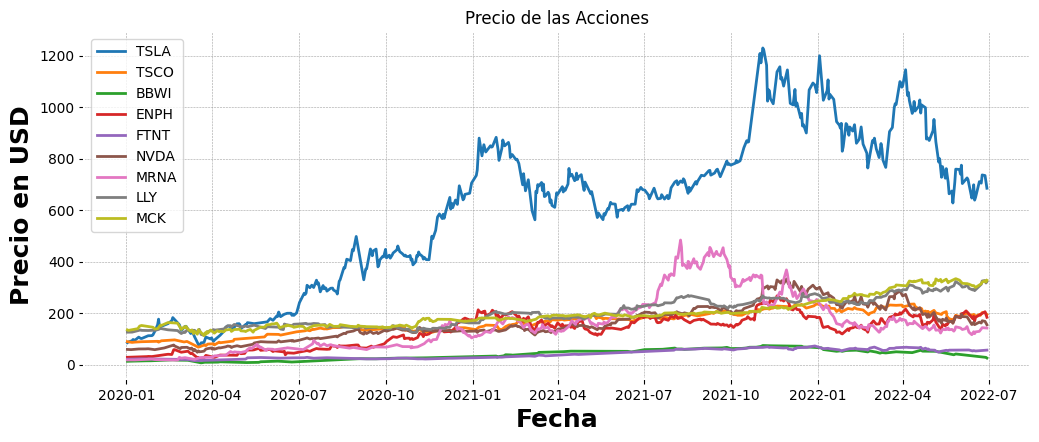

In [81]:
plt.figure(figsize=(12.2,4.5)) 
for i in df_activos.columns.values:
    plt.plot( df_activos[i],  label=i)
plt.title('Precio de las Acciones')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio en USD',fontsize=18)
plt.legend(df_activos.columns.values, loc='upper left')

plt.show()

Calculamos los retornos lognormales 

In [82]:
df = np.log(1 + df.pct_change())
df = df.dropna()
df

,TSLA,TSCO,BBWI,ENPH,FTNT,NVDA,MRNA,LLY,MCK,^GSPC
Date,,,,,,,,,,
2020-01-03,0.029203,-0.012428,0.075414,-0.001706,0.013853,-0.016135,-0.017839,-0.003334,-0.014306,-0.007085
2020-01-06,0.019072,-0.003377,-0.037822,0.012553,0.007079,0.004185,-0.041065,0.003712,0.010477,0.003527
2020-01-07,0.038067,-0.018056,-0.007739,0.011065,-0.000983,0.012034,-0.019494,0.001888,-0.002246,-0.002807
2020-01-08,0.048033,0.018711,0.007188,0.033123,0.015783,0.001874,0.011186,0.009015,0.019468,0.004890
2020-01-09,-0.022189,-0.009862,0.043661,0.018853,0.007101,0.010923,0.023091,0.016393,0.005251,0.006633
...,...,...,...,...,...,...,...,...,...,...
2022-06-23,-0.004316,0.034651,-0.012448,0.036746,0.019772,-0.008286,0.051492,0.019471,0.011539,0.009487
2022-06-24,0.044255,0.020860,0.046628,-0.011427,0.040202,0.054044,0.007025,0.040423,0.021660,0.030106
2022-06-27,-0.003207,-0.002269,-0.005508,0.038466,-0.004747,-0.015120,0.007527,0.005054,0.014480,-0.002977


In [83]:
#Lognormal al dataframe de los activos que ya habiamos separado
df_activos = np.log(1 + df_activos.pct_change())
df_activos = df_activos.dropna()
df_activos

,TSLA,TSCO,BBWI,ENPH,FTNT,NVDA,MRNA,LLY,MCK
Date,,,,,,,,,
2020-01-03,0.029203,-0.012428,0.075414,-0.001706,0.013853,-0.016135,-0.017839,-0.003334,-0.014306
2020-01-06,0.019072,-0.003377,-0.037822,0.012553,0.007079,0.004185,-0.041065,0.003712,0.010477
2020-01-07,0.038067,-0.018056,-0.007739,0.011065,-0.000983,0.012034,-0.019494,0.001888,-0.002246
2020-01-08,0.048033,0.018711,0.007188,0.033123,0.015783,0.001874,0.011186,0.009015,0.019468
2020-01-09,-0.022189,-0.009862,0.043661,0.018853,0.007101,0.010923,0.023091,0.016393,0.005251
...,...,...,...,...,...,...,...,...,...
2022-06-23,-0.004316,0.034651,-0.012448,0.036746,0.019772,-0.008286,0.051492,0.019471,0.011539
2022-06-24,0.044255,0.020860,0.046628,-0.011427,0.040202,0.054044,0.007025,0.040423,0.021660
2022-06-27,-0.003207,-0.002269,-0.005508,0.038466,-0.004747,-0.015120,0.007527,0.005054,0.014480


GRAFICAMOS LA DISTRIBUCION DE LOS RETORNOS

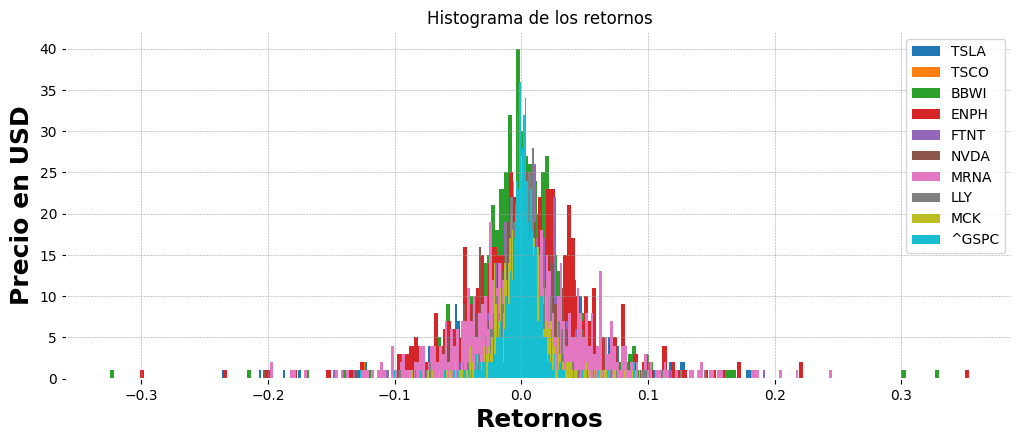

In [84]:
plt.figure(figsize=(12.2,4.5)) 
for i in df.columns.values:
    plt.hist( df[i],  label=i, bins = 200)
plt.title('Histograma de los retornos')
plt.xlabel('Retornos',fontsize=18)
plt.ylabel('Precio en USD',fontsize=18)
plt.legend(df.columns.values)
plt.savefig('plotretornosnormales.png', dpi=300, bbox_inches='tight')
plt.show()

Separamos los retornos del S&P500 - Para utilizarlo como bechmark (rm)

In [85]:
df_benchmark1 =  df.loc[:, df.columns == '^GSPC']

In [86]:
df_benchmark1

,^GSPC
Date,
2020-01-03,-0.007085
2020-01-06,0.003527
2020-01-07,-0.002807
2020-01-08,0.004890
2020-01-09,0.006633
...,...
2022-06-23,0.009487
2022-06-24,0.030106
2022-06-27,-0.002977


CALCULO DEL CAPM CON LA LIBRERIA pypfopt ( Ke = rf - B(rm - rf))

In [87]:
retornos1 = expected_returns.capm_return(df_activos, market_prices = df_benchmark1, returns_data= True, risk_free_rate=0.07, frequency=252)
retornos1

TSLA    0.010602
TSCO    0.040627
BBWI    0.010960
ENPH    0.002710
FTNT    0.022013
NVDA    0.006213
MRNA    0.053716
LLY     0.042600
MCK     0.035871
Name: mkt, dtype: float64

Calculo de matriz de VARIANZAS

In [88]:
df_cov = df_activos.cov()*252
df_cov

,TSLA,TSCO,BBWI,ENPH,FTNT,NVDA,MRNA,LLY,MCK
TSLA,0.550564,0.079668,0.168550,0.316384,0.167428,0.229573,0.104382,0.026347,0.053242
TSCO,0.079668,0.121368,0.073896,0.099179,0.074679,0.086647,0.032183,0.036996,0.044620
BBWI,0.168550,0.073896,0.501364,0.210979,0.114144,0.145591,0.005982,0.042465,0.063437
ENPH,0.316384,0.099179,0.210979,0.721985,0.207637,0.260940,0.120073,0.054716,0.063223
FTNT,0.167428,0.074679,0.114144,0.207637,0.236801,0.180841,0.103628,0.050362,0.055174
NVDA,0.229573,0.086647,0.145591,0.260940,0.180841,0.307771,0.099194,0.064660,0.067752
MRNA,0.104382,0.032183,0.005982,0.120073,0.103628,0.099194,0.774715,0.039010,0.017830
LLY,0.026347,0.036996,0.042465,0.054716,0.050362,0.064660,0.039010,0.125079,0.053515
MCK,0.053242,0.044620,0.063437,0.063223,0.055174,0.067752,0.017830,0.053515,0.113071


PRIMERO DETERMINAMOS LOS PESOS DE CADA ACTIVO EQUITATIVAMENTE

In [89]:
def pesosPortafolio(dataframe):
    array = []
    for i in dataframe.columns:
        array.append(1/len(dataframe.columns))
    arrayFinal = np.array(array)
    return arrayFinal
pesos = pesosPortafolio(df_activos)
pesos

array([0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111])

CALCULO DE VARIANZA

In [90]:
varianza_portafolio = pesos.T @df_cov @pesos
"La varianza del portafolio es:" + " " + str(round(varianza_portafolio*100,1))+"%"

'La varianza del portafolio es: 13.2%'

CALCULO DE VOLATILIDAD

In [91]:
volatilidad_portafolio = np.sqrt(varianza_portafolio)
"La volatilidad del portafolio es:" + " " + str(round(volatilidad_portafolio*100,1))+"%"

'La volatilidad del portafolio es: 36.3%'

CALCULO DE RENTABILIDAD

In [92]:
retorno_portafolio = np.sum(pesos*retornos1)
'El retorno anual del portafolio es:' + ' ' + str(round(retorno_portafolio*100,3)) + '%'

'El retorno anual del portafolio es: 2.503%'

OPTIMIZACION - MINIMA VARIANZA CON LIBRERIA pypfopt 

VEMOS CUALES SON LOS W PARA OBTENER EL PORTAFOLIO DE MVG

In [93]:

ef = EfficientFrontier(retornos1, df_cov, weight_bounds=(0,1))
weights = ef.min_volatility() 
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) 
ef.portfolio_performance(verbose=True)

OrderedDict([('TSLA', 0.01535), ('TSCO', 0.31462), ('BBWI', 0.01635), ('ENPH', 0.0), ('FTNT', 0.01338), ('NVDA', 0.0), ('MRNA', 0.04853), ('LLY', 0.2855), ('MCK', 0.30627)])
Expected annual return: 3.9%
Annual volatility: 26.0%
Sharpe Ratio: 0.07


(0.039173753296833896, 0.25962539408759094, 0.07385160979424518)

OPTIMIZACION - MAXIMIZANDO RATIO DE SHARPE CON LIBRERIA pypfopt 

In [94]:
ef = EfficientFrontier(retornos1, df_cov,weight_bounds=(0,1))
weights = ef.max_sharpe() 
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) 
ef.portfolio_performance(verbose=True)

OrderedDict([('TSLA', 0.0), ('TSCO', 0.37254), ('BBWI', 0.0), ('ENPH', 0.0), ('FTNT', 0.0), ('NVDA', 0.0), ('MRNA', 0.1063), ('LLY', 0.41226), ('MCK', 0.10891)])
Expected annual return: 4.2%
Annual volatility: 27.3%
Sharpe Ratio: 0.08


(0.04231381827215298, 0.27270452746903456, 0.08182415774041997)

El ratio de Sharpe indica la rentabilidad de la inversión ajustada a su riesgo  y se calcula
* Sharpe= (Rendimiento del activo - Rendimiento del activo libre de riesgo)/ Desvio

Cuanto mayor es el ratio de Sharpe, mejor es la rentabilidad en relación al riesgo que se ha tomado en la inversión. 

GRAFICO DE CORRELACION DE LAS COMPAÑIAS ELEGIDAS

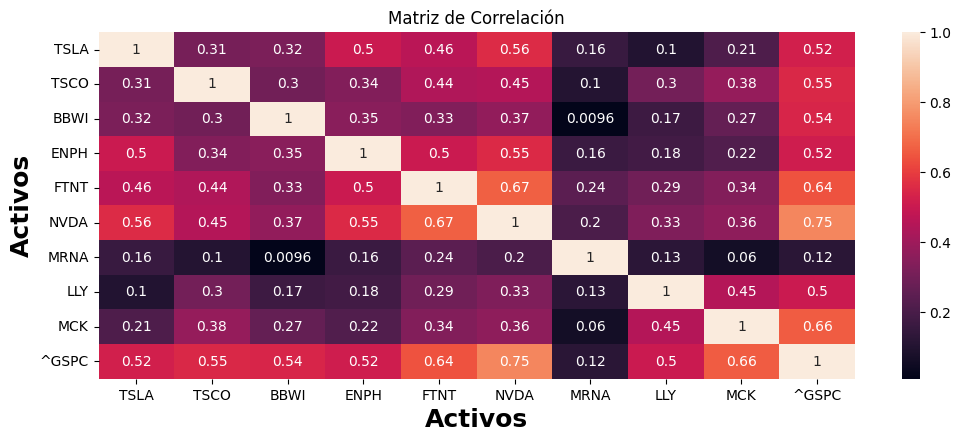

In [95]:
correlation_mat = df.corr()
plt.figure(figsize=(12.2,4.5))
sns.heatmap(correlation_mat, annot = True)
plt.title('Matriz de Correlación')
plt.xlabel('Activos',fontsize=18)
plt.ylabel('Activos',fontsize=18)
plt.show()

**MUCHAS GRACIAS!**

**AUTOR: Maria Cecilia Romero**